*Material adapted from: http://stanford.edu/~mwaskom/software/seaborn/tutorial/distributions.html*

February, 2016

#KAGGLE: SANTANDER CUSTOMER SATISFACTION

https://www.kaggle.com/c/santander-customer-satisfaction


Downloaded data:
- `train.csv`
- `test.csv`


#EXPLORATORY DATA ANALYSIS

This notebook's main goal is to get acquaintaced with the data.


###IMPORT PACKAGES

Let's import packages used in this notebook:

In [2]:
import pandas as pd
import numpy as np
#import seaborn as sns

In [3]:
#VISUALIZATION
%matplotlib inline
import matplotlib.pyplot as plt

###IMPORT DATA

So first, we import the file "train.csv", that contains the data provided for this project.

In [4]:
#Use panda to import csv
data = pd.read_csv('train.csv', sep=',')
print data.columns.values
#Column 0 includes ad_ref. Column 1 refers to outcome (0= no click, 1=click)
data[:].loc[0:5]

['ID' 'var3' 'var15' 'imp_ent_var16_ult1' 'imp_op_var39_comer_ult1'
 'imp_op_var39_comer_ult3' 'imp_op_var40_comer_ult1'
 'imp_op_var40_comer_ult3' 'imp_op_var40_efect_ult1'
 'imp_op_var40_efect_ult3' 'imp_op_var40_ult1' 'imp_op_var41_comer_ult1'
 'imp_op_var41_comer_ult3' 'imp_op_var41_efect_ult1'
 'imp_op_var41_efect_ult3' 'imp_op_var41_ult1' 'imp_op_var39_efect_ult1'
 'imp_op_var39_efect_ult3' 'imp_op_var39_ult1' 'imp_sal_var16_ult1'
 'ind_var1_0' 'ind_var1' 'ind_var2_0' 'ind_var2' 'ind_var5_0' 'ind_var5'
 'ind_var6_0' 'ind_var6' 'ind_var8_0' 'ind_var8' 'ind_var12_0' 'ind_var12'
 'ind_var13_0' 'ind_var13_corto_0' 'ind_var13_corto' 'ind_var13_largo_0'
 'ind_var13_largo' 'ind_var13_medio_0' 'ind_var13_medio' 'ind_var13'
 'ind_var14_0' 'ind_var14' 'ind_var17_0' 'ind_var17' 'ind_var18_0'
 'ind_var18' 'ind_var19' 'ind_var20_0' 'ind_var20' 'ind_var24_0'
 'ind_var24' 'ind_var25_cte' 'ind_var26_0' 'ind_var26_cte' 'ind_var26'
 'ind_var25_0' 'ind_var25' 'ind_var27_0' 'ind_var28_0' 'ind_var28'

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,39205.170000,0
1,3,2,34,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,49278.030000,0
2,4,2,23,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,67333.770000,0
3,8,2,37,0,195,195,0,0,0,0,...,0,0,0,0,0,0,0,0,64007.970000,0
4,10,2,39,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,117310.979016,0
5,13,2,23,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,87975.750000,0


We have 370 features and 1 label

Let's check types

In [9]:
features = list(data.columns[:4])
print("* features:", features)

('* features:', ['ID', 'var3', 'var15', 'imp_ent_var16_ult1'])


In [12]:
descriptors = data.describe()
print type(descriptors)

<class 'pandas.core.frame.DataFrame'>


In [24]:
descriptors2 = descriptors.transpose()
descriptors2[:][0:50]

,count,mean,std,min,25%,50%,75%,max
ID,76020,75964.050723,43781.947379,1,38104.75,76043,113748.75,151838.00
var3,76020,-1523.199277,39033.462364,-999999,2.00,2,2.00,238.00
var15,76020,33.212865,12.956486,5,23.00,28,40.00,105.00
imp_ent_var16_ult1,76020,86.208265,1614.757313,0,0.00,0,0.00,210000.00
imp_op_var39_comer_ult1,76020,72.363067,339.315831,0,0.00,0,0.00,12888.03
imp_op_var39_comer_ult3,76020,119.529632,546.266294,0,0.00,0,0.00,21024.81
imp_op_var40_comer_ult1,76020,3.559130,93.155749,0,0.00,0,0.00,8237.82
imp_op_var40_comer_ult3,76020,6.472698,153.737066,0,0.00,0,0.00,11073.57
imp_op_var40_efect_ult1,76020,0.412946,30.604864,0,0.00,0,0.00,6600.00
imp_op_var40_efect_ult3,76020,0.567352,36.513513,0,0.00,0,0.00,6600.00


In [30]:
descriptors2[:][300:350]

,count,mean,std,min,25%,50%,75%,max
num_op_var41_efect_ult1,76020,0.719416,3.210999,0.00,0,0.00,0.0000,90.00
num_op_var41_efect_ult3,76020,1.212155,5.160396,0.00,0,0.00,0.0000,156.00
num_op_var39_efect_ult1,76020,0.721902,3.226314,0.00,0,0.00,0.0000,90.00
num_op_var39_efect_ult3,76020,1.215825,5.181092,0.00,0,0.00,0.0000,156.00
num_reemb_var13_hace3,76020,0.000000,0.000000,0.00,0,0.00,0.0000,0.00
num_reemb_var13_ult1,76020,0.001500,0.067057,0.00,0,0.00,0.0000,3.00
num_reemb_var17_hace3,76020,0.000039,0.010881,0.00,0,0.00,0.0000,3.00
num_reemb_var17_ult1,76020,0.001184,0.098523,0.00,0,0.00,0.0000,21.00
num_reemb_var33_hace3,76020,0.000000,0.000000,0.00,0,0.00,0.0000,0.00
num_reemb_var33_ult1,76020,0.000039,0.010881,0.00,0,0.00,0.0000,3.00


In [162]:
#Let's check the data type
data.dtypes.value_counts()

int64      260
float64    111
dtype: int64

In [160]:
integers = data.dtypes =="int64"
print datatypes[integers]

                                   0
ID                             int64
var3                           int64
var15                          int64
ind_var1_0                     int64
ind_var1                       int64
ind_var2_0                     int64
ind_var2                       int64
ind_var5_0                     int64
ind_var5                       int64
ind_var6_0                     int64
ind_var6                       int64
ind_var8_0                     int64
ind_var8                       int64
ind_var12_0                    int64
ind_var12                      int64
ind_var13_0                    int64
ind_var13_corto_0              int64
ind_var13_corto                int64
ind_var13_largo_0              int64
ind_var13_largo                int64
ind_var13_medio_0              int64
ind_var13_medio                int64
ind_var13                      int64
ind_var14_0                    int64
ind_var14                      int64
ind_var17_0                    int64
i

In [161]:
floats = data.dtypes =="float64"
print datatypes[floats]

                                     0
imp_ent_var16_ult1             float64
imp_op_var39_comer_ult1        float64
imp_op_var39_comer_ult3        float64
imp_op_var40_comer_ult1        float64
imp_op_var40_comer_ult3        float64
imp_op_var40_efect_ult1        float64
imp_op_var40_efect_ult3        float64
imp_op_var40_ult1              float64
imp_op_var41_comer_ult1        float64
imp_op_var41_comer_ult3        float64
imp_op_var41_efect_ult1        float64
imp_op_var41_efect_ult3        float64
imp_op_var41_ult1              float64
imp_op_var39_efect_ult1        float64
imp_op_var39_efect_ult3        float64
imp_op_var39_ult1              float64
imp_sal_var16_ult1             float64
saldo_var1                     float64
saldo_var5                     float64
saldo_var6                     float64
saldo_var8                     float64
saldo_var12                    float64
saldo_var13_corto              float64
saldo_var13_largo              float64
saldo_var13              

Let's store the label appart (col = "TARGET")

In [24]:
label = data[["ID","TARGET"]]

In [27]:
label.loc[0:5]

,ID,TARGET
0,1,0
1,3,0
2,4,0
3,8,0
4,10,0
5,13,0


In [28]:
#del data["TARGET"]

In [103]:
print data.shape
print (type(data))

(76020, 370)
<class 'pandas.core.frame.DataFrame'>


In [34]:
data.loc[0:5][0:5]

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,1,2,23,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,39205.170000
1,3,2,34,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,49278.030000
2,4,2,23,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,67333.770000
3,8,2,37,0,195,195,0,0,0,0,...,0,0,0,0,0,0,0,0,0,64007.970000
4,10,2,39,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,117310.979016


It seems all variables are numeric... let's check

In [102]:
typecol = data.columns.values
print(list(data[:].loc[1]))

[3.0, 2.0, 34.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 3.0, 3.0, 0.0, 0.0, 0.0, 0.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 0.0, 0.0, 0.0, 3.0, 0.0, 0.0, 3.0, 0.0, 0.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 300.0, 0.0, 0.0, 300.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 300.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 0.0, 0.0, -1.0, 0

We have a panda's dataframe, 76020 cases and 370 features + 1 label. 

##Which features to check?



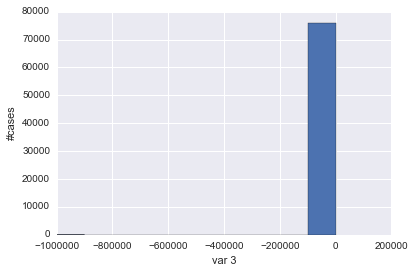

In [152]:
#Let's plot the number of adults per booking

plt.hist(data["var3"].loc[:])
plt.xlabel("var 3")
plt.ylabel("#cases")
plt.show()

Let's see if price and previous days impact click. First all data:

C:\Anaconda\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


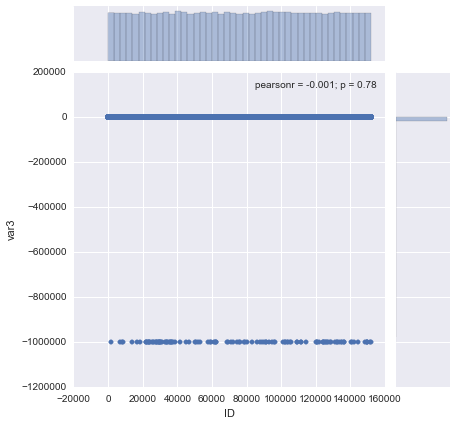

In [113]:
sns.jointplot(x="ID", y="var3",data=data[:].loc[:]);

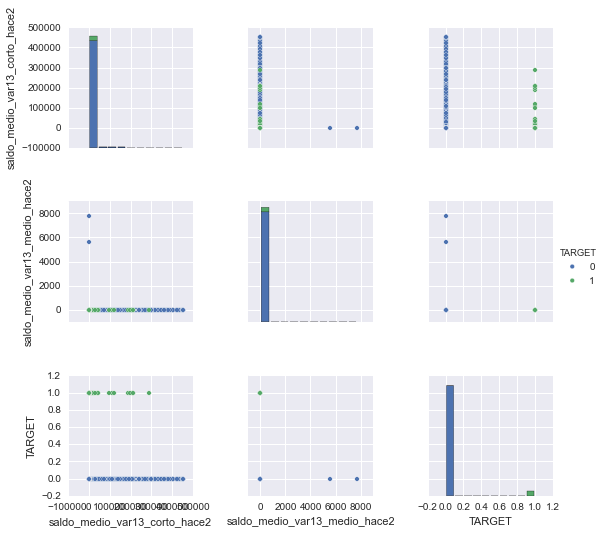

In [157]:
data_3 = data[["saldo_medio_var13_corto_hace2","saldo_medio_var13_medio_hace2","TARGET"]].loc[:]
sns.pairplot(data_3, hue="TARGET")

In [118]:
adv = data["var3"].loc[:]
print(adv.quantile(q=0.99))

11.0


In [126]:
data.dtypes

ID                                 int64
var3                               int64
var15                              int64
imp_ent_var16_ult1               float64
imp_op_var39_comer_ult1          float64
imp_op_var39_comer_ult3          float64
imp_op_var40_comer_ult1          float64
imp_op_var40_comer_ult3          float64
imp_op_var40_efect_ult1          float64
imp_op_var40_efect_ult3          float64
imp_op_var40_ult1                float64
imp_op_var41_comer_ult1          float64
imp_op_var41_comer_ult3          float64
imp_op_var41_efect_ult1          float64
imp_op_var41_efect_ult3          float64
imp_op_var41_ult1                float64
imp_op_var39_efect_ult1          float64
imp_op_var39_efect_ult3          float64
imp_op_var39_ult1                float64
imp_sal_var16_ult1               float64
ind_var1_0                         int64
ind_var1                           int64
ind_var2_0                         int64
ind_var2                           int64
ind_var5_0      

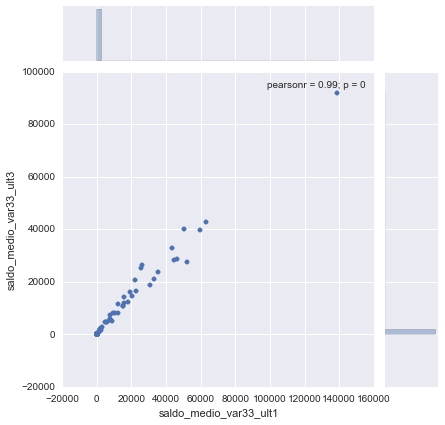

In [151]:
#Parece que hay variables repetidas.... veamos la diferencia

sns.jointplot(x="saldo_medio_var33_ult1", y="saldo_medio_var33_ult3",data=data.loc[:]);

That's it for now!

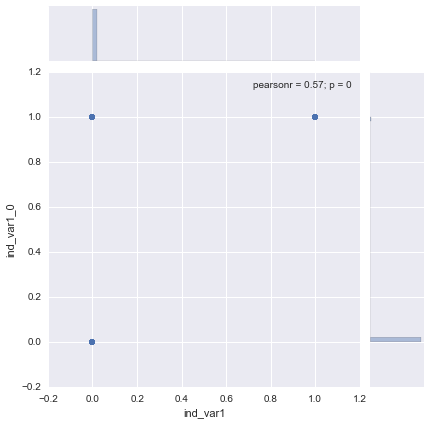

In [150]:
#Parece que hay variables repetidas.... veamos la diferencia

sns.jointplot(x="ind_var1", y="ind_var1_0",data=data.loc[:]);

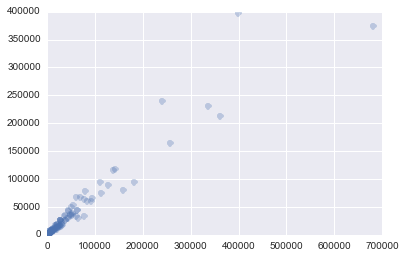

In [169]:
var1 = data["saldo_medio_var44_ult1"]
var2 = data["saldo_medio_var44_ult3"]
plt.plot(var1, var2, "o", alpha=0.3) 